In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats

res = pd.read_table("C:/Users/416et/Desktop/real-estate-sample-1200.txt")

In [2]:
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,320000,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000,0.35,No,22,No,Gas,3,1040,63,1,0,3,0
3,158900,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [3]:
res['Central Air'] = res['Central Air'].sample(frac=0.8)
res['Sale Price'] = res['Sale Price'].sample(frac=0.8)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,NaN,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000.0,0.35,No,22,NaN,Gas,3,1040,63,1,0,3,0
3,NaN,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [4]:
res.isnull().sum()

Sale Price     240
Lot Size         0
Waterfront       0
Age              0
Central Air    240
Fuel Type        0
Condition        0
Living Area      0
Pct College      0
Full Baths       0
Half Baths       0
Bedrooms         0
Fireplaces       0
dtype: int64

In [5]:
print('The missing rate is', res['Central Air'].isnull().sum()/res['Central Air'].size)

The missing rate is 0.2


In [6]:
print(res.shape)
res.head()

(1200, 13)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces
0,NaN,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0
2,125000.0,0.35,No,22,NaN,Gas,3,1040,63,1,0,3,0
3,NaN,0.21,No,3,No,Oil,3,1292,52,2,0,3,1
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0


In [15]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [25]:
train_y1=res[res['Sale Price'].notnull()]['Sale Price']
train_x1=res[res['Sale Price'].notnull()].loc[:,['Lot Size','Living Area']]
train_x1.head()

,Lot Size,Living Area
1,0.63,1792
2,0.35,1040
4,0.17,1412
5,1.08,1735
6,0.16,852


In [27]:
test_x1=res[res['Sale Price'].isnull()].loc[:,['Lot Size','Living Area']]
test_x1.head()

,Lot Size,Living Area
0,0.61,2492
3,0.21,1292
7,0.15,988
12,0.16,1602
13,0.68,2132


In [41]:
train_y2=res[res['Central Air'].notnull()]['Central Air']
train_x2=res[res['Central Air'].notnull()].loc[:,['Lot Size','Living Area']]

In [42]:
test_x2=res[res['Central Air'].isnull()].loc[:,['Lot Size','Living Area']]

In [47]:
def knn_filled(x_train, y_train, test, k = 3, dispersed = True):
    if dispersed:
        clf = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    else:
        clf = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    
    clf.fit(x_train, y_train)
    return test.index, clf.predict(test)

In [48]:
index_SalePrice, pred_SalePrice = knn_filled(train_x1,train_y1,test_x1,k=3)

In [49]:
index_CentralAir, pred_CentralAir = knn_filled(train_x2,train_y2,test_x2,k=3)

In [50]:
res.loc[index_SalePrice,'Sale Price']=pred_SalePrice

In [51]:
res.loc[index_CentralAir,'Central Air']=pred_CentralAir

In [53]:
res.isnull().sum()

Sale Price       0
Lot Size         0
Waterfront       0
Age              0
Central Air      0
Fuel Type        0
Condition        0
Living Area      0
Pct College      0
Full Baths       0
Half Baths       0
Bedrooms         0
Fireplaces       0
lprice         240
dtype: int64

In [54]:
price=res['Sale Price'];
res['lprice']=np.log(price)
res.head()

,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,339000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.733755
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0,12.278393
2,125000.0,0.35,No,22,Yes,Gas,3,1040,63,1,0,3,0,11.736069
3,195500.0,0.21,No,3,No,Oil,3,1292,52,2,0,3,1,12.183316
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475


In [55]:
lprice = res.iloc[:,-1]

In [56]:
ca = res.loc[res['Central Air']=='Yes']
print(ca.shape)
ca.head()

(469, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
0,339000.0,0.61,No,6,Yes,Oil,3,2492,64,2,1,4,1,12.733755
1,215000.0,0.63,No,21,Yes,Gas,3,1792,64,1,1,3,0,12.278393
2,125000.0,0.35,No,22,Yes,Gas,3,1040,63,1,0,3,0,11.736069
9,264900.0,0.55,No,16,Yes,Oil,3,1897,63,2,1,4,1,12.487108
12,257732.0,0.16,No,25,Yes,Oil,3,1602,54,1,1,2,1,12.459676


In [57]:
nca = res.loc[res['Central Air']=='No']
print(nca.shape)
nca.head()

(731, 14)


,Sale Price,Lot Size,Waterfront,Age,Central Air,Fuel Type,Condition,Living Area,Pct College,Full Baths,Half Baths,Bedrooms,Fireplaces,lprice
3,195500.0,0.21,No,3,No,Oil,3,1292,52,2,0,3,1,12.183316
4,82000.0,0.17,No,21,No,Oil,2,1412,57,2,1,2,0,11.314475
5,219200.0,1.08,No,30,No,Oil,3,1735,61,1,1,4,1,12.297740
6,125000.0,0.16,No,133,No,Oil,2,852,57,1,1,2,0,11.736069
7,149000.0,0.15,No,18,No,Gas,3,988,52,1,1,2,0,11.911702


In [58]:
caPrice = ca['lprice']
caPrice.head()

0     12.733755
1     12.278393
2     11.736069
9     12.487108
12    12.459676
Name: lprice, dtype: float64

In [59]:
ncaPrice = nca['lprice']
ncaPrice.head()

3    12.183316
4    11.314475
5    12.297740
6    11.736069
7    11.911702
Name: lprice, dtype: float64

In [60]:
caPrice.describe()

count    469.000000
mean      12.430704
std        0.430525
min       11.242690
25%       12.132964
50%       12.434840
75%       12.721886
max       13.959611
Name: lprice, dtype: float64

In [61]:
ncaPrice.describe()

count    731.000000
mean      12.073026
std        0.447220
min       10.221941
25%       11.813030
50%       12.083905
75%       12.358963
max       13.534473
Name: lprice, dtype: float64

In [62]:
list=[]
def pt(caPrice, ncaPrice):
    n = len(caPrice)
    p_val = 0
    lprice = np.concatenate([caPrice, ncaPrice])
    for j in range(10000):
        np.random.shuffle(lprice)
        x = np.mean(lprice[:n]) - np.mean(lprice[n:])
        list.append(x)
        if(x< np.mean(ncaPrice) - np.mean(caPrice)):
            p_val = p_val +1
    print('p value is ', p_val / 10000)

In [63]:
pt(caPrice,ncaPrice)

p value is  0.0


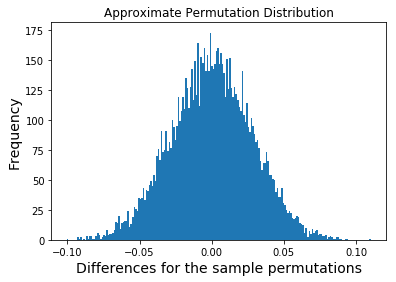

In [64]:
plt.hist(list,bins=200)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');

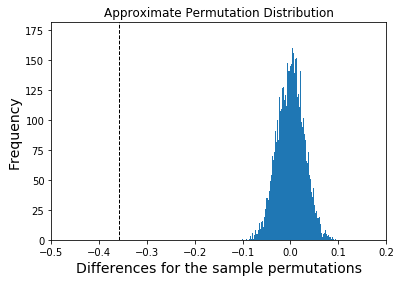

In [65]:
plt.hist(list,bins=200)
plt.axvline( np.mean(ncaPrice)-np.mean(caPrice),color='k', linestyle='dashed', linewidth=1)
plt.xlim(-0.5,0.2)
plt.xlabel('Differences for the sample permutations',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Approximate Permutation Distribution');